In [73]:
!pwd

/Users/elliott.botwick@ibm.com/Documents/MortgageWebApp


In [1]:
import pandas as pd
loans = pd.read_csv("/Users/elliott.botwick@ibm.com/Documents/MortgageWebApp/MortgageTrainingData.csv")

In [3]:
loans.head()

,ID,IncomeAdj,AppliedOnline,Residence,YearCurrentAddress,YearsCurrentEmployer,NumberOfCards,CCDebt,Loans,LoanAmount,SalePrice,State,LoanDefault
0,100522,72570.30,YES,Owner Occupier,13,11,2,1055,0,9405,500000,NY,NO
1,101756,98907.60,YES,Owner Occupier,20,11,2,3894,0,9880,750000,NY,NO
2,101354,95234.70,YES,Owner Occupier,25,16,2,1555,1,6285,155000,PA,YES
3,100512,75274.65,YES,Owner Occupier,1,19,1,1878,0,9260,195000,VA,YES
4,100537,74383.65,NO,Owner Occupier,14,15,2,713,1,8430,140000,NY,NO


In [9]:
loans[loans['LoanDefault']=="NO"].corr()

,ID,IncomeAdj,YearCurrentAddress,YearsCurrentEmployer,NumberOfCards,CCDebt,Loans,LoanAmount,SalePrice
ID,1.000000,-0.008822,0.034167,0.029627,0.068991,0.016132,-0.015160,0.012433,-0.090407
IncomeAdj,-0.008822,1.000000,0.313627,0.205007,0.058351,0.192571,-0.006476,-0.059033,0.046757
YearCurrentAddress,0.034167,0.313627,1.000000,0.059626,-0.053745,0.168436,0.008815,-0.058700,-0.020508
YearsCurrentEmployer,0.029627,0.205007,0.059626,1.000000,0.020163,0.402617,0.063506,0.104361,-0.013002
NumberOfCards,0.068991,0.058351,-0.053745,0.020163,1.000000,-0.093818,0.057967,-0.041067,-0.074826
CCDebt,0.016132,0.192571,0.168436,0.402617,-0.093818,1.000000,0.015896,0.594223,0.009844
Loans,-0.015160,-0.006476,0.008815,0.063506,0.057967,0.015896,1.000000,-0.033331,-0.017645
LoanAmount,0.012433,-0.059033,-0.058700,0.104361,-0.041067,0.594223,-0.033331,1.000000,-0.133300
SalePrice,-0.090407,0.046757,-0.020508,-0.013002,-0.074826,0.009844,-0.017645,-0.133300,1.000000


In [11]:
sampled_loans = loans.sample(1000, replace = True)

(array([312., 210.,  69.,  52.,  74.,  61.,  59.,  56.,  58.,  49.]),
 array([71148.  , 73923.96, 76699.92, 79475.88, 82251.84, 85027.8 ,
        87803.76, 90579.72, 93355.68, 96131.64, 98907.6 ]),
 <a list of 10 Patch objects>)

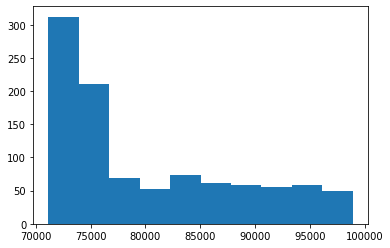

In [80]:
import matplotlib.pyplot as plt

plt.hist(sampled_loans.IncomeAdj)

In [81]:
import numpy as np
from numpy import random
sampled_loans['IncomeAdj_noise'] = sampled_loans['IncomeAdj'].apply(lambda x: np.around(x * random.uniform(0.9, 1.1)/5, decimals=2)*5)

(array([100., 156., 188., 171., 108., 100.,  82.,  39.,  33.,  23.]),
 array([ 64403.2 ,  68666.34,  72929.48,  77192.62,  81455.76,  85718.9 ,
         89982.04,  94245.18,  98508.32, 102771.46, 107034.6 ]),
 <a list of 10 Patch objects>)

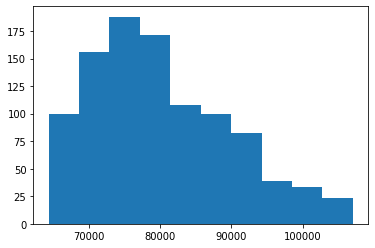

In [82]:
import matplotlib.pyplot as plt

plt.hist(sampled_loans.IncomeAdj_noise)

In [12]:
sampled_loans['Default']= (sampled_loans.LoanDefault == "YES").astype("int")

In [30]:
sampled_loans.corr()['ID'].sort_values(ascending = False)[0]

1.0

In [31]:
sampled_loans.head()

,ID,IncomeAdj,AppliedOnline,Residence,YearCurrentAddress,YearsCurrentEmployer,NumberOfCards,CCDebt,Loans,LoanAmount,SalePrice,State,LoanDefault,Default
290,101421,93201.90,YES,Owner Occupier,5,11,1,696,1,4240,110000,VA,NO,0
166,100353,72448.20,NO,Public Housing,18,15,1,4242,0,7915,190000,VA,NO,0
225,100604,81521.55,NO,Owner Occupier,23,13,2,1793,0,8950,180000,VA,YES,1
23,100494,91444.65,NO,Owner Occupier,11,3,2,1169,0,10715,245000,PA,YES,1
73,100535,82480.20,YES,Private Renting,14,21,2,2660,0,9645,210000,VA,NO,0


In [84]:
sampled_loans[2:3]

,ID,IncomeAdj,AppliedOnline,Residence,YearCurrentAddress,YearsCurrentEmployer,NumberOfCards,CCDebt,Loans,LoanAmount,SalePrice,State,LoanDefault,IncomeAdj_noise,Default
340,100450,90210.45,YES,Owner Occupier,15,22,2,3086,1,11875,180000,VA,NO,90468.75,0


In [85]:
sampled_loans.reset_index(drop = True, inplace = True)

In [86]:
sampled_loans[1:2]['Default']==0

1    True
Name: Default, dtype: bool

In [93]:
j = 0
for i in range(len(sampled_loans)):
    if(sampled_loans[i:(i+1)]['Default']==0)[i]:
        j = j+1                       
        sampled_loans['YearsCurrentAddress_noise'] = sampled_loans['YearCurrentAddress'].apply(lambda x: x * np.around(random.uniform(0.5, 1.5), 0)).astype("int")
    else: 
        sampled_loans['YearsCurrentAddress_noise'] = sampled_loans['YearCurrentAddress'].apply(lambda x: x * np.around(random.uniform(1.5, 2.5), 0)).astype("int")

In [88]:
vary = (sampled_loans[i:i+1]['Default']==0)[i]
vary

False

In [89]:
sampled_loans.Default.value_counts()

0    572
1    428
Name: Default, dtype: int64

In [90]:
for i in range(10):
    if(sampled_loans[i:(i+1)]['Default']==0)[i]:
         print(i, 'yee')

0 yee
1 yee
2 yee
3 yee
5 yee
6 yee
9 yee


In [91]:
# sampled_loans['YearsCurrentAddress_noise'] = sampled_loans['YearCurrentAddress'].apply(lambda x: x * np.around(random.uniform(0.4, 1.7), 0)).astype("int")

In [94]:
sampled_loans['YearsCurrentEmployer_noise'] = sampled_loans['YearsCurrentEmployer'].apply(lambda x: x * np.around(random.uniform(0.3, 2), 0)).astype("int")

In [95]:
sampled_loans['NumberOfCards_noise'] = sampled_loans['NumberOfCards'].apply(lambda x: x * np.around(random.uniform(0.3, 2), 0)).astype("int")

# plt.hist(sampled_loans.YearsCurrentAddress_noise)

In [96]:
sampled_loans['Default_noise'] = sampled_loans['Default'].apply(lambda x: x * np.around(random.uniform(0.65, 1.35), 0)).astype("int")

In [97]:
(sampled_loans['YearsCurrentEmployer']==sampled_loans['YearsCurrentEmployer_noise']).sum()

595

In [107]:
(sampled_loans['YearCurrentAddress']==sampled_loans['YearsCurrentAddress_noise']).sum()

40

In [99]:
(sampled_loans['IncomeAdj']==sampled_loans['IncomeAdj_noise']).sum()

0

In [100]:
(sampled_loans['NumberOfCards']==sampled_loans['NumberOfCards_noise']).sum()

580

In [101]:
sampled_loans[sampled_loans.Default ==0].YearsCurrentAddress_noise.describe()

count    572.000000
mean      23.566434
std       15.342698
min        0.000000
25%       12.000000
50%       22.000000
75%       34.000000
max       62.000000
Name: YearsCurrentAddress_noise, dtype: float64

In [200]:
sampled_loans[sampled_loans.Default ==1].YearsCurrentAddress_noise.describe()

count    418.000000
mean      25.693780
std       14.302723
min        0.000000
25%       16.000000
50%       26.000000
75%       36.000000
max       68.000000
Name: YearsCurrentAddress_noise, dtype: float64

In [120]:
# sampled_loans['RandDefault']= random.uniform(1,2)
sampled_loans['RandDefault'] = np.random.randint(0, 2, sampled_loans.shape[0])

In [121]:
sampled_loans.RandDefault.value_counts()

0    522
1    478
Name: RandDefault, dtype: int64

In [118]:
j = 0
for i in range(len(sampled_loans)):
    if(sampled_loans[i:(i+1)]['RandDefault']==0)[i]:
        j = j+1                       
        sampled_loans['YearsCurrentAddress_noise'] = sampled_loans['YearCurrentAddress'].apply(lambda x: x * np.around(random.uniform(0, 2), 0)).astype("int")
    else: 
        sampled_loans['YearsCurrentAddress_noise'] = sampled_loans['YearCurrentAddress'].apply(lambda x: x * np.around(random.uniform(1.5, 3), 0)).astype("int")

In [122]:
sampled_loans.corr()['RandDefault'].loc[abs(sampled_loans.corr()['RandDefault'])>0.025].sort_values(ascending=False)

RandDefault                  1.000000
NumberOfCards_noise          0.082952
LoanAmount                   0.031753
YearsCurrentEmployer        -0.027041
IncomeAdj_noise             -0.049066
ID                          -0.053317
IncomeAdj                   -0.055684
YearsCurrentAddress_noise   -0.064422
Name: RandDefault, dtype: float64

In [117]:
sampled_loans.corr()['RandDefault']

ID                           -0.036392
IncomeAdj                     0.037918
YearCurrentAddress            0.018272
YearsCurrentEmployer         -0.050422
NumberOfCards                -0.041958
CCDebt                       -0.014836
Loans                         0.042000
LoanAmount                   -0.074159
SalePrice                     0.096418
IncomeAdj_noise               0.051895
Default                      -0.030607
YearsCurrentAddress_noise     0.018272
YearsCurrentEmployer_noise   -0.005330
NumberOfCards_noise          -0.027652
Default_noise                -0.030607
RandDefault                   1.000000
Name: RandDefault, dtype: float64